In [2]:
from tabulate import tabulate
from skimage import io
import pandas as pd

In [3]:
import numpy
import matplotlib.pyplot as plt
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)

### Cálculo energético de un ciclo de una etapa condiciones Cerro Prieto

Text(0.5, 1.0, 'Diagrama T-s')

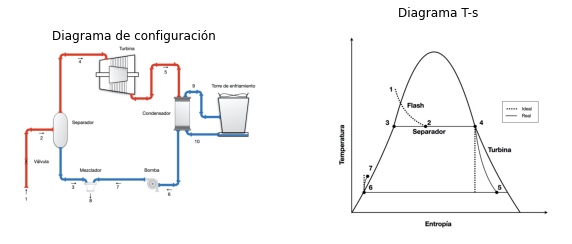

In [4]:
image1=io.imread("../fig/1etapa.jpeg")/255.0
image2=io.imread("../fig/001.jpeg")/255.0
fig = plt.figure(figsize=(10, 7)) 
fig.add_subplot(1, 2, 1) 
plt.imshow(image1,vmin=0,vmax=1) 
plt.axis('off') 
plt.title("Diagrama de configuración") 
fig.add_subplot(1, 2, 2) 
plt.imshow(image2,vmin=0,vmax=1) 
plt.axis('off') 
plt.title("Diagrama T-s") 

In [18]:
T1 = 250 #ºC
P1 = 6.5 #bar
H_P1 = (steamTable.hL_t(T1))
P2 = P1
P3 = P2
P4 = P3
P7 = P2
Flujo_mas1 = 420 #kg/s
P5 = 0.115 #bar
nsf = 0.85
nII = 0.3072
Ho = 317.17
So = 1.4088
Po = 101.325*0.01
To = 293

### Para Punto$_3$

In [11]:
x2 = (steamTable.x_ph(P2,H_P1))
H_P3 = (steamTable.hL_p(P3))
S_P3 = (steamTable.sL_p(P3))
T_P3 = (steamTable.t_ph(P3,H_P3))
Fm_P3 = 420 * (1-x2)
Pt3 = T_P3,P3,H_P3,S_P3,Fm_P3
x3 = 1-x2
x3

0.8065552715715186

### Para Punto$_4$

In [13]:
H_P4 = (steamTable.hV_p(P4))
S_P4 = (steamTable.sV_p(P4))
T_P4 = (steamTable.t_ph(P4,H_P4))
Fm_P4 = 420 * x2
Pt4 = T_P4,P4,H_P4,S_P4,Fm_P4
x2

0.19344472842848134

### Para Punto$_2$

In [14]:
T_P2 = T_P4
H_P2 = H_P1
S_P2 = (steamTable.s_ph(P2,H_P2))
Pt2 = T_P2,P2,H_P2,S_P2,Flujo_mas1
Pt2

(161.9787167829494, 6.5, 1085.686812680083, 2.885236126703387, 420)

### Para Punto$_5$

In [15]:
S_P5s = S_P4
H_P5s = (steamTable.h_ps(P5,S_P5s))
WITurbina = H_P4 - H_P5s
H_P5R = H_P4 - (nsf*WITurbina)
S_P5R = (steamTable.s_ph(P5,H_P5R))
T_P5 = (steamTable.t_ps(P5,S_P5R))
Fm_P5 = Fm_P4
Pt5 = T_P5,P5,H_P5R,S_P5R,Fm_P5
Pt5

(48.568225783223454,
 0.115,
 2240.365898621563,
 7.0169142454190006,
 81.24678593996217)

### Para Punto$_6$

In [16]:
T_P6 = T_P5
P6 = P5
S_P6 = (steamTable.sL_p(P5))
H_P6 = (steamTable.hL_p(P5))
v6 = (steamTable.v_ph(P6,H_P6))
Fm_P6 = Fm_P5
Pt6 = T_P6,P6,H_P6,S_P6,Fm_P6
Pt6

(48.568225783223454,
 0.115,
 203.3511968245453,
 0.6852346030989352,
 81.24678593996217)

### Para Punto$_7$

In [17]:
T_P7 = T_P5
H_P7 = (steamTable.h_pt(P7,T_P5))
S_P7 = (steamTable.s_pt(P7,T_P5))
Fm_P7 = Fm_P6
Pt7 = T_P7,P7,H_P7,S_P7,Fm_P7
Pt7

(48.568225783223454,
 6.5,
 203.90397400617118,
 0.6849456447852458,
 81.24678593996217)

### Flujo de calor en el condensador

In [41]:
Q_condensador = (H_P5R - H_P6)*(Fm_P6)

### Potencia neta de salida de todo el sistema

In [40]:
W_bomba = v6 * (P7 - P6)*10000
W_turbina = ( H_P4 - H_P5R)*(Fm_P6)
Wtotal = W_turbina - W_bomba

### Para Punto$_8$

In [42]:
Primera = Wtotal/(H_P2*(250-30))

In [43]:
R = [W_bomba, W_turbina, Wtotal, Q_condensador,Primera]
columnas = ['Resultados']
filas = ['Bomba [kW]','Turbina [kW]','Potencia total [kW]','Flujo en el condensador [kW]','Eficiencia 1ra Ley']
df2 = pd.DataFrame(R,columns = columnas, index = filas)
df2

,Resultados
Bomba [kW],64.583415
Turbina [kW],42185.698590
Potencia total [kW],42121.115175
Flujo en el condensador [kW],165500.897433
Eficiencia 1ra Ley,0.176349


In [23]:
Resultados = [Pt2, Pt3, Pt4, Pt5,Pt6,Pt7]
columnas = ['T [ºC]','P [bar]','h [kJ/kg]','s[kJ/kgK]','Flujo másico [kg/s]']
filas = [2,3,4,5,6,7]
df = pd.DataFrame(Resultados,columns = columnas, index = filas)
df

,T [ºC],P [bar],h [kJ/kg],s[kJ/kgK],Flujo másico [kg/s]
2,161.978717,6.500,1085.686813,2.885236,420.000000
3,162.009843,6.500,684.215602,1.962601,338.753214
4,161.978717,6.500,2759.595036,6.732104,81.246786
5,48.568226,0.115,2240.365899,7.016914,81.246786
6,48.568226,0.115,203.351197,0.685235,81.246786
7,48.568226,6.500,203.903974,0.684946,81.246786


### Cálculo termo económico

In [47]:
Z_B = 1120 * ((W_bomba)**0.8)
Z_T = 6000 * ((W_turbina)**0.7)
Z_V = 114.5 * (Flujo_mas1)
Z_S = 280.3 * ((Flujo_mas1)**0.67)

In [50]:
row = [Z_B,Z_T,Z_V,Z_S]
row_1 = ['Bomba','Turbina','Válvula de expansión','Separador']
k = ['Costo de inversión estimado']
df_tec = pd.DataFrame(row,columns=k,index=row_1)
df_tec

,Costo de inversión estimado
Bomba,3.142786e+04
Turbina,1.036972e+07
Válvula de expansión,4.809000e+04
Separador,1.603984e+04


### Balances exergéticos

In [35]:
Ex2 = Flujo_mas1*((H_P2-Ho)-To*(S_P2-So))
Ex3 = Fm_P3*((H_P3-Ho)-To*(S_P3-So))
Ex4 = Fm_P4*((H_P4-Ho)-To*(S_P4-So))
Ex5 = Fm_P5*((H_P5R-Ho)-To*(S_P5R-So))
Ex6 = Fm_P6*((H_P6-Ho)-To*(S_P6-So))
Ex7 = Fm_P7*((H_P7-Ho)-To*(S_P7-So))

In [38]:
f = [Ex2,Ex3,Ex4,Ex5,Ex6,Ex7]
fila = [2,3,4,5,6,7]
c = ['Exergías']
df_Ex = pd.DataFrame(f,columns=c,index=fila)
df_Ex

,Exergías
2,141086.831574
3,69370.531680
4,71716.299893
5,22750.597012
6,7977.285397
7,8029.075508
